## Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

In [1]:
%matplotlib inline
import numpy as np
import scipy.optimize as sp

In [2]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)

def h(x):
    return int(f(x))

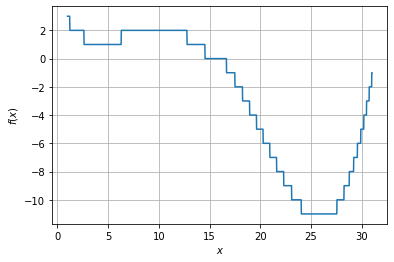

In [3]:
from matplotlib import pylab as plt

x = np.arange(1, 31, 0.01)  #Массив значений аргумента
y_list = []
for i in x:
    y = int(np.sin(i/5) * np.exp(i/10) + 5*np.exp(-i/2))
    y_list.append(y)
    
plt.plot(x, y_list) #Построение графика
plt.xlabel(r'$x$') #Метка по оси x в формате TeX
plt.ylabel(r'$f(x)$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
plt.show() #Показать график

1. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [4]:
res = sp.minimize(h, 30, method='BFGS')
res

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

2. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [5]:
bounds = [(1,30)]
res = sp.differential_evolution(h, bounds)
res

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([24.46584606])

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.